<a href="https://colab.research.google.com/github/KashyapaAayushman/FDS-Tutorial_1/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving rainfallprediction.xlsx to rainfallprediction.xlsx


In [ ]:
import pandas as pd

# Assuming the uploaded file is named 'your_dataset.xlsx'
data = pd.read_excel('rainfallprediction.xlsx')


In [ ]:
data.head()  # Check the first few rows of the dataset
data.info()  # Check the data types and null values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1474 non-null   object 
 1   datetime          1474 non-null   object 
 2   tempmax           1474 non-null   float64
 3   tempmin           1474 non-null   float64
 4   temp              1474 non-null   float64
 5   feelslikemax      1474 non-null   float64
 6   feelslikemin      1474 non-null   float64
 7   feelslike         1474 non-null   float64
 8   dew               1474 non-null   float64
 9   humidity          1474 non-null   float64
 10  precip            1474 non-null   float64
 11  precipprob        1474 non-null   int64  
 12  precipcover       1474 non-null   float64
 13  preciptype        710 non-null    object 
 14  snow              1474 non-null   int64  
 15  snowdepth         1474 non-null   int64  
 16  windgust          1474 non-null   float64


In [ ]:
data = data.dropna()  # Drop rows with missing values



In [ ]:
data.info()  # Check data types of each column


<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 738 to 1473
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              466 non-null    object 
 1   datetime          466 non-null    object 
 2   tempmax           466 non-null    float64
 3   tempmin           466 non-null    float64
 4   temp              466 non-null    float64
 5   feelslikemax      466 non-null    float64
 6   feelslikemin      466 non-null    float64
 7   feelslike         466 non-null    float64
 8   dew               466 non-null    float64
 9   humidity          466 non-null    float64
 10  precip            466 non-null    float64
 11  precipprob        466 non-null    int64  
 12  precipcover       466 non-null    float64
 13  preciptype        466 non-null    object 
 14  snow              466 non-null    int64  
 15  snowdepth         466 non-null    int64  
 16  windgust          466 non-null    float64
 17 

In [ ]:
# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data, drop_first=True)



In [ ]:
ta

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming the last column is the target (rainfall), and the rest are features
features = data.iloc[:, :-1].values
target = data.iloc[:, -1].values

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)



ValueError: could not convert string to float: 'chennai'

In [ ]:
features = data_encoded.iloc[:, :-1].values  # Update to use the encoded data
target = data_encoded.iloc[:, -1].values

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)



In [ ]:
features = data_encoded.iloc[:, :-1].values  # Update to use the encoded data
target = data_encoded.iloc[:, -1].values

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [ ]:
import numpy as np

# Reshaping data for LSTM input (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0034 - val_loss: 2.0723e-05
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015 - val_loss: 6.7024e-05
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0076 - val_loss: 3.7059e-05
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018 - val_loss: 6.7825e-05
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 2.7420e-05
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - val_loss: 4.8817e-05
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2509e-04 - val_loss: 8.4092e-05
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0031 - val_loss: 1.0467e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029 - val_loss: 1.3477e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043 - val_loss: 2.1390e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0017 - val_loss: 3.6527e-04
Epoc

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019     
Test Loss: 0.002296321326866746


In [ ]:
predictions = model.predict(X_test)

# Optionally, reverse the scaling to get predictions in the original scale
predictions_inverse = scaler.inverse_transform(predictions)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ValueError: non-broadcastable output operand with shape (94,1) doesn't match the broadcast shape (94,1360)

In [ ]:
# Scaling the target values (if applicable)
from sklearn.preprocessing import MinMaxScaler

target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = target_scaler.fit_transform(target.reshape(-1, 1))

# After training and predictions
predictions = model.predict(X_test)
predictions_inverse = target_scaler.inverse_transform(predictions)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the target values
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = target_scaler.fit_transform(target.reshape(-1, 1))

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Model definition
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predicting
predictions_scaled = model.predict(X_test)

# Inverse transform predictions
predictions_inverse = target_scaler.inverse_transform(predictions_scaled)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 7.0214e-04 - val_loss: 3.6369e-05
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018 - val_loss: 1.1906e-05
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2553e-04 - val_loss: 1.7620e-05
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 2.8709e-05
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3078e-04 - val_loss: 3.8121e-05
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0031 - val_loss: 1.0756e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.6752e-04 - val_loss: 1.8658e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5242e-04 - val_loss: 1.4374e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 2.1147e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - val_loss: 3.5541e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - val_loss: 7.3457e-04
E

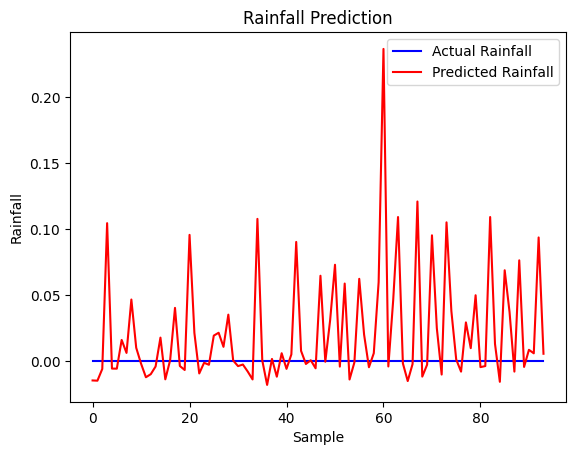

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test, color='blue', label='Actual Rainfall')
plt.plot(predictions, color='red', label='Predicted Rainfall')
plt.title('Rainfall Prediction')
plt.xlabel('Sample')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


In [ ]:
model.save('rainfall_prediction_model.h5')


In [ ]:
from google.colab import files
files.download('rainfall_prediction_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Upload and load the new dataset containing actual rainfall values
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Assuming the new dataset is named 'recent_rainfall.xlsx'
new_data = pd.read_excel('edited.xlsx')


Saving edited.xlsx to edited.xlsx


In [ ]:
# Assuming 'new_data' has the same features as the original dataset
# Extract features and (if applicable) scale them using the same scaler

new_features = new_data.iloc[:, :-1].values  # Exclude the target column (assumed to be the last column)

# Scale the features using the same scaler used earlier
new_features_scaled = scaler.transform(new_features)

# Reshape for LSTM model if needed
new_features_scaled = np.reshape(new_features_scaled, (new_features_scaled.shape[0], 1, new_features_scaled.shape[1]))


ValueError: could not convert string to float: 'Chennai'

In [ ]:
new_data.info()  # This will show the data types of each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8958 entries, 0 to 8957
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _id       8958 non-null   int64  
 1   District  8958 non-null   object 
 2   Station   8958 non-null   object 
 3   Rainfall  8958 non-null   float64
 4   Date      8958 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 350.0+ KB


In [ ]:
new_data_encoded = pd.get_dummies(new_data, drop_first=True)


In [ ]:
new_features = new_data_encoded.iloc[:, :-1].values  # Use encoded data


In [ ]:
# Ensure that new_data_encoded has the same columns as the original data
original_columns = list(data_encoded.columns)  # Replace with the correct variable for your original dataset
new_data_encoded = pd.get_dummies(new_data, drop_first=True)

# Align the new dataset with the original columns
new_data_encoded = new_data_encoded.reindex(columns=original_columns, fill_value=0)


In [ ]:
new_features = new_data_encoded.iloc[:, :-1].values  # Exclude the target column

# Now you can scale the features
new_features_scaled = scaler.transform(new_features)

# Reshape for LSTM if necessary
new_features_scaled = np.reshape(new_features_scaled, (new_features_scaled.shape[0], 1, new_features_scaled.shape[1]))



In [ ]:
# Predict using the trained model
new_predictions = model.predict(new_features_scaled)

# If the target was scaled, reverse that scaling
new_predictions_inverse = target_scaler.inverse_transform(new_predictions)

# Compare with actual values
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(new_target, new_predictions_inverse)
mae = mean_absolute_error(new_target, new_predictions_inverse)
r2 = r2_score(new_target, new_predictions_inverse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(new_target, color='blue', label='Actual Rainfall')
plt.plot(new_predictions_inverse, color='red', label='Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Days')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


NameError: name 'new_target' is not defined

In [ ]:
new_features_scaled = scaler.transform(new_features)


In [ ]:
new_features_scaled = np.reshape(new_features_scaled, (new_features_scaled.shape[0], 1, new_features_scaled.shape[1]))


In [ ]:
# Assuming 'new_data' has the same features as the original dataset
# Extract features and (if applicable) scale them using the same scaler

new_features = new_data.iloc[:, :-1].values  # Exclude the target column (assumed to be the last column)

# Scale the features using the same scaler used earlier
new_features_scaled = scaler.transform(new_features)

# Reshape for LSTM model if needed
new_features_scaled = np.reshape(new_features_scaled, (new_features_scaled.shape[0], 1, new_features_scaled.shape[1]))


ValueError: could not convert string to float: 'Chennai'

In [ ]:
new_target = new_data_encoded['preciptype'].values  # Replace 'Rainfall' with the actual column name for the target


KeyError: 'preciptype'

In [ ]:
new_data_encoded = pd.get_dummies(new_data, drop_first=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
new_data['name'] = labelencoder.fit_transform(new_data['name'])  # Replace 'City' with your categorical column name


KeyError: 'name'

In [ ]:
# Predict rainfall using the trained model
new_predictions = model.predict(new_features_scaled)

# If the target values were scaled, inverse transform the predictions
new_predictions_inverse = target_scaler.inverse_transform(new_predictions)


280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# Extract actual rainfall values from the new dataset
actual_rainfall = new_data.iloc[:, -1].values

# Optionally, if actual rainfall data was scaled, reverse that scaling
# (Skip this if the actual values were not scaled originally)
# actual_rainfall_inverse = target_scaler.inverse_transform(actual_rainfall.reshape(-1, 1))

# Calculate the accuracy or performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(actual_rainfall, new_predictions_inverse)
mae = mean_absolute_error(actual_rainfall, new_predictions_inverse)
r2 = r2_score(actual_rainfall, new_predictions_inverse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


ValueError: could not convert string to float: '1993-03-03T00:00:00'

In [ ]:
print(new_data.head())  # Check the first few rows of your new dataset
print(new_data.columns)  # Print the column names to identify the target column


     _id District                      Station  Rainfall                 Date
0  12459  Chennai               Sholinganallur      42.0  2020-01-01T00:00:00
1  12460  Chennai  Gov hr sec school MGR Nagar       8.2  2020-01-01T00:00:00
2  12461  Chennai                     Ambathur       6.0  2020-01-01T00:00:00
3  12462  Chennai                      Alandur       5.1  2020-01-01T00:00:00
4  12463  Chennai    Perambur Corporation park       3.0  2020-01-01T00:00:00
Index(['_id', 'District', 'Station', 'Rainfall', 'Date'], dtype='object')


In [ ]:
# Assuming the actual rainfall data is in a column named 'Rainfall'
actual_rainfall = new_data['Rainfall'].values


In [ ]:
# If your dataset includes a date column, drop or separate it
new_data = new_data.drop(columns=['Date'])
actual_rainfall = new_data['Rainfall'].values  # Extract the numerical rainfall values


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(actual_rainfall, new_predictions_inverse)
mae = mean_absolute_error(actual_rainfall, new_predictions_inverse)
r2 = r2_score(actual_rainfall, new_predictions_inverse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Squared Error: 1276.03181417527
Mean Absolute Error: 19.372183533869276
R² Score: -0.4166320975154665


In [ ]:
# Extract actual rainfall values from the new dataset
actual_rainfall = new_data.iloc[:, -1].values

# Optionally, if actual rainfall data was scaled, reverse that scaling
# (Skip this if the actual values were not scaled originally)
# actual_rainfall_inverse = target_scaler.inverse_transform(actual_rainfall.reshape(-1, 1))

# Calculate the accuracy or performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(actual_rainfall, new_predictions_inverse)
mae = mean_absolute_error(actual_rainfall, new_predictions_inverse)
r2 = r2_score(actual_rainfall, new_predictions_inverse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Squared Error: 1276.03181417527
Mean Absolute Error: 19.372183533869276
R² Score: -0.4166320975154665


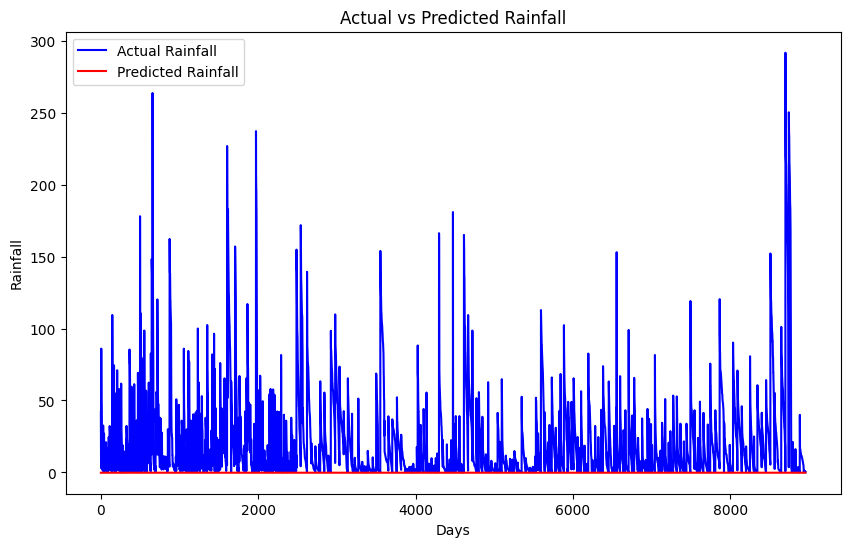

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_rainfall, color='blue', label='Actual Rainfall')
plt.plot(new_predictions_inverse, color='red', label='Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Days')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predictions before inverse scaling: [[-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]]
Predictions after inverse scaling: [[-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]
 [-0.19468744]]


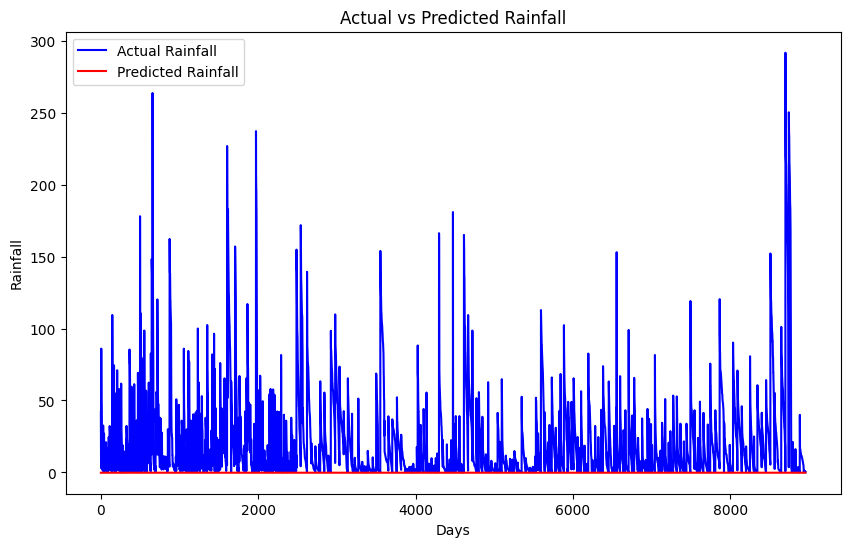

In [ ]:
# Predict using the trained model
new_predictions = model.predict(new_features_scaled)

# Check predictions before inverse scaling
print("Predictions before inverse scaling:", new_predictions[:10])  # Print first 10 predictions

# If target scaling was applied, reverse the scaling
new_predictions_inverse = target_scaler.inverse_transform(new_predictions)

# Check predictions after inverse scaling
print("Predictions after inverse scaling:", new_predictions_inverse[:10])  # Print first 10 predictions

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(actual_rainfall, color='blue', label='Actual Rainfall')
plt.plot(new_predictions_inverse, color='red', label='Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Days')
plt.ylabel('Rainfall')
plt.legend()
plt.show()
